In [17]:
#Import vizdoom for game environment
from vizdoom import *
# import random for random sampling 
import random
#import time for sleeping
import numpy as np
# numpy to create arrays and matrices
import time

In [18]:
#Setup game by creating an instance of DoomGame, 
game = DoomGame()
#loading the configuration file and initializing the game.
game.load_config("deathmatch.cfg")
# loading the scenario file and setting it to deathmatch.
actions= np.identity(23, dtype=np.uint8) # modify this
# modify this to make the agent learn to take different actions

In [19]:
game.init()
#initializing the game
episodes = 3
for episode in range(episodes):
    # creates a new episode or game , basically resets the game
    game.new_episode()
    # check if the game is done or not 
    while not game.is_episode_finished():
        # get the state of the game
        state = game.get_state()
        # this method returns the screen buffer of the game basically a 3-d array of the game screen 
        #so for every action the agent takes we see a new screen buffer
        # the screen buffer will be one of the inputs in pur network through a convolutional layer
        img = state.screen_buffer
        print("screen buffer:",img, "its end!!!")
        #gets the game variables like ammo, health, etc.
        # every scenario has different game variables
        # can be seen listed as the game variables in the scenario file
        info= state.game_variables
        #takes an action randomly from the list of actions
        # the seoond parameter is the frame skip, which means that after the action that many number of frames will be skipped 
        # before the next action is taken, this way we can see the result of the action taken
        reward = game.make_action(random.choice(actions),4)
        print(random.choice(actions), reward, info)
        time.sleep(0.01)
    print("Result:", game.get_total_reward())
    time.sleep(1.5)
    

screen buffer: [[[123 123 139 ...   0   0   0]
  [123 123 123 ...   0   0   0]
  [123 123 123 ...   0   0   0]
  ...
  [ 19  19  11 ...  47  47  55]
  [ 19  27  19 ...  47  47  47]
  [ 11  19  19 ...  27  19  19]]

 [[ 99  99 115 ...   0   0   0]
  [ 99  99  99 ...   0   0   0]
  [ 99  99  99 ...   0   0   0]
  ...
  [ 19  19  11 ...  47  47  55]
  [ 19  27  19 ...  47  47  47]
  [ 11  19  19 ...  27  19  19]]

 [[ 79  79  91 ...  11  35  35]
  [ 79  79  79 ...  23  23  35]
  [ 79  79  79 ...  35  35  11]
  ...
  [ 19  19  11 ...  47  47  55]
  [ 19  27  19 ...  47  47  47]
  [ 11  19  19 ...  27  19  19]]] its end!!!
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0] 0.0 [  0. 100.   0.   2.  50.]
screen buffer: [[[123 123 139 ...   0   0   0]
  [123 123 123 ...   0   0   0]
  [123 123 123 ...   0   0   0]
  ...
  [ 19  19  11 ...  47  47  55]
  [ 19  27  19 ...  47  47  47]
  [ 11  19  19 ...  27  19  19]]

 [[ 99  99 115 ...   0   0   0]
  [ 99  99  99 ...   0   0   0]
  [ 99  99  99 .

ViZDoomUnexpectedExitException: Controlled ViZDoom instance exited unexpectedly.

The frame_skip parameter in the make_action function of the ViZDoom API determines how many frames will be skipped before the next action is taken. In a video game, the game state updates many times per second, typically 30 or 60 times, with each update corresponding to a "frame". If an agent takes an action every frame, it might be reacting too quickly to changes in the game state, which can be computationally expensive and may not improve the agent's performance.

By setting the frame_skip parameter to a number greater than 1, you're telling the game to skip a certain number of frames after each action. This means the agent will only take a new action every frame_skip frames, while the game continues to run in between. This can make the agent's behavior more efficient and easier to manage.


Now we will convert the code into classes and convert it into a gym environment


In [9]:
!pip3 install gym
!pip3 install opencv-python



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 38.1 MB/s eta 0:00:0000:0100:01


In [20]:
#import environment class from gym module
from gym import Env
from gym.spaces import Box, Discrete
import cv2



In the context of the provided code, `Box` and `Discrete` are classes from the `gym` library, which is a popular library for developing and comparing reinforcement learning algorithms. They are used to define the observation space and action space of the environment:

1. **Box**: This class is used to define a multi-dimensional box. It's used for the `observation_space` because the observations in this environment are images of the game screen, which can be represented as 3D arrays of pixel values. The `Box` class takes the following parameters:
   - `low` and `high`: These define the minimum and maximum values that can be contained in the box. In this case, they are 0 and 255, which are the minimum and maximum values for a pixel intensity.
   - `shape`: This defines the shape of the box. In this case, it's (100,160,1), which means the game screen is 100 pixels high, 160 pixels wide, and has 1 color channel (grayscale).
   - `dtype`: This defines the data type of the values in the box. In this case, it's `np.uint8`, which means the pixel values are 8-bit unsigned integers.

2. **Discrete**: This class is used to define a space of discrete values. It's used for the `action_space` because the actions in this environment are discrete, meaning the agent can choose one action from a set of distinct actions. The `Discrete` class takes one parameter, which is the number of distinct actions. In this case, it's 3, which means the agent has 3 different actions it can choose from.

In your code, `self.observation_space = Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8)` defines the observation space, and `self.action_space = Discrete(3)` defines the action space.

In [25]:
#Create Vizdoom openAI gym environment
class VizDoomGym(Env):
    #Function that is called when we start the en- constructor of the class
    def __init__(self, render=False):
        #initialize the game
        self.game = DoomGame()
        #loading the configuration file
        self.game.load_config("defend_the_center.cfg")
        #loading the scenario file
        #  Render frame logic
        if render==False:
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        # Start the game 
        self.game.init()
        #Create the action space and observation space 
        self.observation_space = Box(low=0, high=255, shape=(480, 640, 3), dtype= np.uint8)
        

        self.action_space = Discrete(3)
    # this mehtod tells the agent how to take a step in the environment
    def step(self, action):
        """This method is called when the agent takes a step in the environment.
          It takes an action as input and returns the new state, 
        the reward, whether the episode is done, and additional info."""
        # Specify action and take step 
        actions = np.identity(3)
        reward = self.game.make_action(actions[action], 4) 
        
        # Get all the other stuff we need to retun 
        if self.game.get_state(): 
            state = self.game.get_state().screen_buffer
            # the above line gives us the screen pixes in the form of 3-d arrays
            state = self.grayscale(state)
            # this line converts the 3-d array into a 2-d array of grayscale image representation
            ammo = self.game.get_state().game_variables[0]
            info = ammo
            # the else contion is for the case when the screen buffer is not available
            # this can happen when the game is done
        else: 
            state = np.zeros(self.observation_space.shape)
            info = 0 
        
        info = {"info":info}
        done = self.game.is_episode_finished()
        
        return state, reward, done, info 
    #Grayscale the game frame and resize it
    def grayscale(self,observation):
        gray= cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_RGB2GRAY)
        resize= cv2.resize(gray, (160, 100),interpolation=cv2.INTER_CUBIC)
        state= np.reshape(resize,(100,160,1))
        return state
    def reset(self):
        self.game.new_episode()
        state=self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    def render(self):
        pass

    def close(self):
        self.game.close()

In [26]:
#Create an instance of the environment
env= VizDoomGym(render=False)
state= env.reset()
s,r,d,i= env.step(1)
print(s.shape, r, d, i)


(100, 160, 1) 0.0 False {'info': 26.0}


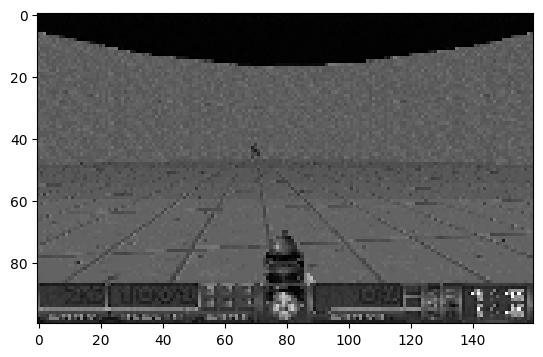

In [27]:

# The state of the game is a 2-d gray scle image that can be viewied using matplotlib
import matplotlib.pyplot as plt
plt.imshow(s[:,:,0], cmap='gray')

In [33]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip3 install stable-baselines3

Looking in indexes: https://download.pytorch.org/whl/cpu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 6.9 MB/s eta 0:00:00


In [34]:
# Import os for file nav
import os 
# Import callback class from sb3
from stable_baselines3.common.callbacks import BaseCallback

Callback is useful when we want to save the reinforcement learning model as we go ahead with the training , we can even save different versions of the model and training parts , I think this is very useful for our project, gives us more version control capabilities and room to try different parameters and compare them.


In [ ]:

class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True
    

The above code defines a custom callback class for a machine learning model training process. Callbacks are used to perform actions at various stages of training (e.g., at the start or end of an epoch, before or after a batch, etc.). Here's a line-by-line explanation:

In the TrainAndLoggingCallback class, the __init__ method is defined with three parameters:

check_freq: This parameter is expected to be an integer. It represents the frequency at which the model should be checked and potentially saved during training. For example, if check_freq is set to 100, the model will be checked and potentially saved every 100 steps.

save_path: This parameter is expected to be a string. It represents the path where the model should be saved. For example, if save_path is set to './models/', the model will be saved in the 'models' directory in the current working directory.



In [35]:
CHECKPOINT_PATH =  "checkpoint"# Add path to save model
#LOG_DIR= 
# Add path to save logs

SyntaxError: invalid syntax (83370111.py, line 1)

In [ ]:
# import ppo for training
from stable_baselines3 import PPO
# Non rendered environment
env = VizDoomGym()
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, n_steps=4096)
model.learn(total_timesteps=100000, callback=callback)